# **Memory Profiling Analysis**
Using the *memory_profiler* pip package, we analyse ClusTCR's memory usage against iSMART, GLIPH2 and tcrdist3.


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

from clustcr.clustering.clustering import Clustering
from clustcr.input.datasets import metarepertoire
from clustcr.modules.gliph2.gliph2 import GLIPH2
from clustcr.modules.ismart.ismart import iSMART
from clustcr.modules.tcrdist.pw_tcrdist import tcrdist


Set the path to a folder containing immuneaccess data files (such as Emerson et al)

In [ ]:
IMMUNEACCESS = '/home/max/Documents/bio/emerson-2017-natgen'


We define some helper functions to profile the memory usage and retrieve data from the above folder.

In [ ]:
def memory(f, *args):
    return memory_usage((f, args, {}), max_usage=True, include_children=True)


def meta(n, out='CDR3'):
    return metarepertoire(directory=IMMUNEACCESS,
                          data_format='immuneaccess',
                          out_format=out,
                          n_sequences=n)

In [40]:
sample_sizes = [4000, 8000, 20000, 60000]
result = {
    'GLIPH2': [],
    'iSMART': [],
    'clusTCR': [],
    'tcrdist3*': []
}

for size in sample_sizes:
    cdr3 = meta(size)
    cdr3_gliph2 = meta(size, 'GLIPH2')
    cdr3_tcrdist = meta(size, 'TCRDIST')

    result['tcrdist3*'].append(memory(tcrdist, cdr3_tcrdist) if size < 10000 else None)
    result['GLIPH2'].append(memory(GLIPH2, cdr3_gliph2))
    result['iSMART'].append(memory(iSMART, cdr3))
    result['clusTCR'].append(memory(lambda: Clustering(n_cpus='all').fit(cdr3)))

    print(size, result)

<ipython-input-40-9326a06e5609>:10: DtypeWarning: Columns (29,36) have mixed types.Specify dtype option on import or set low_memory=False.
  cdr3 = meta(size)
<ipython-input-40-9326a06e5609>:11: DtypeWarning: Columns (29,36) have mixed types.Specify dtype option on import or set low_memory=False.
  cdr3_gliph2 = meta(size, 'GLIPH2')
<ipython-input-40-9326a06e5609>:11: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  cdr3_gliph2 = meta(size, 'GLIPH2')
<ipython-input-40-9326a06e5609>:12: DtypeWarning: Columns (29,36) have mixed types.Specify dtype option on import or set low_memory=False.
  cdr3_tcrdist = meta(size, 'TCRDIST')
<ipython-input-40-9326a06e5609>:12: DtypeWarning: Columns (29,34,36) have mixed types.Specify dtype option on import or set low_memory=False.
  cdr3_tcrdist = meta(size, 'TCRDIST')
<ipython-input-40-9326a06e5609>:10: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=Fals

pw dist calculations for 4000 sequences with tcrdist.
CREATED /bb2e39ffc2e4/ FOR HOLDING DISTANCE OUT OF MEMORY
RETURNING scipy.sparse csr_matrix w/dims (4000, 4000)
CLEANING UP bb2e39ffc2e4
Elapsed time: 14.540754556655884 seconds.
Clustering 4000 sequences with GLIPH2.
Elapsed time: 4.320370435714722 seconds.
Clustering 4000 sequences with iSMART.
Elapsed time: 1.4219179153442383 seconds.
4000 {'GLIPH2': [2176.0546875], 'iSMART': [2165.55859375], 'clusTCR': [10279.234375], 'tcrdist3*': [3144.140625]}
pw dist calculations for 8000 sequences with tcrdist.
CREATED /ece2c865675f/ FOR HOLDING DISTANCE OUT OF MEMORY
RETURNING scipy.sparse csr_matrix w/dims (7987, 7987)
CLEANING UP ece2c865675f
Elapsed time: 54.71325206756592 seconds.
Clustering 8000 sequences with GLIPH2.
Elapsed time: 7.948998689651489 seconds.
Clustering 8000 sequences with iSMART.
Elapsed time: 3.979224443435669 seconds.
8000 {'GLIPH2': [2176.0546875, 2181.171875], 'iSMART': [2165.55859375, 2198.0078125], 'clusTCR': [10

## **Plot results**

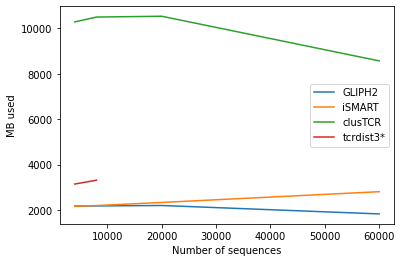

In [41]:
plt.figure()
for name, values in result.items():
    plt.plot(sample_sizes, values, label=name)
plt.xlabel('Number of sequences')
plt.ylabel('MB used')
plt.legend(loc='best')
plt.show()